**Project: Wrangle and Analyze Data**

**Introduction**

**Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.**

**The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage**

**Importing all required libraries**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import requests 
import re
import json
import os 
import tweepy
from tweepy import OAuthHandler
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
#This code was added at the request of the review 

from timeit import default_timer as timer


# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Gather:

**Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 We were unable to use Twitter's private data because they were rejected, so we relied on the files in Udacity**

In [3]:
# Open the csv file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

tweet = pd.read_json('tweet-json copy.csv',lines=True)

In [4]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [5]:
# Showing the data in the twitter_archive file
df_twitter_archive.head(3).T

0  \
tweet_id                                                   892420643555336193   
in_reply_to_status_id                                                     NaN   
in_reply_to_user_id                                                       NaN   
timestamp                                           2017-08-01 16:23:56 +0000   
source                      <a href="http://twitter.com/download/iphone" r...   
text                        This is Phineas. He's a mystical boy. Only eve...   
retweeted_status_id                                                       NaN   
retweeted_status_user_id                                                  NaN   
retweeted_status_timestamp                                                NaN   
expanded_urls               https://twitter.com/dog_rates/status/892420643...   
rating_numerator                                                           13   
rating_denominator                                                         10   
name                                                                  Phineas   
doggo                                                                    None   
floofer                                                                  None   
pupper                                                                   None   
puppo                                                                    None   

                                                                            1  \
tweet_id                                                   892177421306343426   
in_reply_to_status_id                                                     NaN   
in_reply_to_user_id                                                       NaN   
timestamp                                           2017-08-01 00:17:27 +0000   
source                      <a href="http://twitter.com/download/iphone" r...   
text                        This is Tilly. She's just checking pup on you....   
retweeted_status_id                                                       NaN   
retweeted_status_user_id                                                  NaN   
retweeted_status_timestamp                                                NaN   
expanded_urls               https://twitter.com/dog_rates/status/892177421...   
rating_numerator                                                           13   
rating_denominator                                                         10   
name                                                                    Tilly   
doggo                                                                    None   
floofer                                                                  None   
pupper                                                                   None   
puppo                                                                    None   

                                                                            2  
tweet_id                                                   891815181378084864  
in_reply_to_status_id                                                     NaN  
in_reply_to_user_id                                                       NaN  
timestamp                                           2017-07-31 00:18:03 +0000  
source                      <a href="http://twitter.com/download/iphone" r...  
text                        This is Archie. He is a rare Norwegian Pouncin...  
retweeted_status_id                                                       NaN  
retweeted_status_user_id                                                  NaN  
retweeted_status_timestamp                                                NaN  
expanded_urls               https://twitter.com/dog_rates/status/891815181...  
rating_numerator                                                           12  
rating_denominator                                                         10  
name                                                                   Archie  
doggo                                 

**tweet data**

In [6]:
# view the first 3 rows 
tweet.head(3)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  

[3 rows x 31 columns]

In [7]:
#Show the number of columns and rows
tweet.shape

(2354, 31)


### Assessing

**(Visual assessment) Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes**

**twitter_archiv assessin**

In [8]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_twitter_archive.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
192   855818117272018944                    NaN                  NaN   
1141  727644517743104000                    NaN                  NaN   
1291  708119489313951744                    NaN                  NaN   

                      timestamp  \
192   2017-04-22 16:18:34 +0000   
1141  2016-05-03 23:42:26 +0000   
1291  2016-03-11 02:36:57 +0000   

                                                 source  \
192   <a href="http://twitter.com/download/iphone" r...   
1141  <a href="http://twitter.com/download/iphone" r...   
1291  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
192   I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...                  NaN   
1141  Here's a doggo struggling to cope with the win...                  NaN   
1291  This is Cooper. He basks in the glory of rebel...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
192                        NaN                        NaN   
1141                       NaN                        NaN   
1291                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
192   https://twitter.com/markhalperin/status/855656...                13   
1141  https://twitter.com/dog_rates/status/727644517...                13   
1291  https://twitter.com/dog_rates/status/708119489...                 9   

      rating_denominator    name  doggo floofer pupper puppo  
192                   10    None   None    None   None  None  
1141                  10    None  doggo    None   None  None  
1291                  10  Cooper   None    None   None  None

In [10]:
#find if there is any duplicated values
df_twitter_archive.duplicated().sum()

0

we no have any duplicated values

In [12]:
# cheek null value in all columns
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

From the results shown to us, it turns out that there are some missing data

We need to change the type of some data

Delete unnecessary data

**image_predictions Assessing**

In [13]:
# View last 5 rows of image_predictions DataFrame
df_image_predictions.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# View info of image_predictions DataFrame
df_image_predictions.sample(3)

tweet_id                                          jpg_url  \
704   684926975086034944  https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg   
1751  824297048279236611  https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg   
1201  741067306818797568  https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   

      img_num                  p1   p1_conf  p1_dog                  p2  \
704         1  Labrador_retriever  0.769412    True    golden_retriever   
1751        2               teddy  0.588230   False       jigsaw_puzzle   
1201        1    golden_retriever  0.843799    True  Labrador_retriever   

       p2_conf  p2_dog       p3   p3_conf  p3_dog  
704   0.144893    True     lion  0.021440   False  
1751  0.028910   False  doormat  0.022251   False  
1201  0.052956    True   kelpie  0.035711    True

In [15]:
# View descriptive statistics of image_predictions DataFrame
df_image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [16]:
#find if there is any duplicated values
df_image_predictions.duplicated().sum()

0

We don't have any duplicated here

In [17]:
# cheek null value in all columns
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

we no have any missing values

In [19]:
df_image_predictions[df_image_predictions.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [20]:
df_image_predictions['p1'].value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
zebra                    1
fiddler_crab             1
American_black_bear      1
cheeseburger             1
suit                     1
Name: p1, Length: 378, dtype: int64

In [21]:
df_image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hummingbird             1
nail                    1
cradle                  1
armadillo               1
shower_curtain          1
Name: p2, Length: 405, dtype: int64

In [22]:
df_image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
rhinoceros_beetle      1
otter                  1
orangutan              1
pop_bottle             1
valley                 1
Name: p3, Length: 408, dtype: int64

**tweet data assessing**

In [23]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [24]:
tweet.describe()

id        id_str  in_reply_to_status_id  \
count  2.354000e+03  2.354000e+03           7.800000e+01   
mean   7.426978e+17  7.426978e+17           7.455079e+17   
std    6.852812e+16  6.852812e+16           7.582492e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.783975e+17  6.783975e+17           6.757419e+17   
50%    7.194596e+17  7.194596e+17           7.038708e+17   
75%    7.993058e+17  7.993058e+17           8.257804e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.800000e+01         7.800000e+01   
mean                7.455079e+17         2.014171e+16   
std                 7.582492e+16         1.252797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757419e+17         3.086374e+08   
50%                 7.038708e+17         4.196984e+09   
75%                 8.257804e+17         4.196984e+09   
max                 8.862664e+17         8.405479e+17   

       in_reply_to_user_id_str  geo  coordinates  contributors  retweet_count  \
count             7.800000e+01  0.0          0.0           0.0    2354.000000   
mean              2.014171e+16  NaN          NaN           NaN    3164.797366   
std               1.252797e+17  NaN          NaN           NaN    5284.770364   
min               1.185634e+07  NaN          NaN           NaN       0.000000   
25%               3.086374e+08  NaN          NaN           NaN     624.500000   
50%               4.196984e+09  NaN          NaN           NaN    1473.500000   
75%               4.196984e+09  NaN          NaN           NaN    3652.000000   
max               8.405479e+17  NaN          NaN           NaN   79515.000000   

       favorite_count  possibly_sensitive  possibly_sensitive_appealable  \
count     2354.000000              2211.0                         2211.0   
mean      8080.968564                 0.0                            0.0   
std      11814.771334                 0.0                            0.0   
min          0.000000                 0.0                            0.0   
25%       1415.000000                 0.0                            0.0   
50%       3603.500000                 0.0                            0.0   
75%      10122.250000                 0.0                            0.0   
max     132810.000000                 0.0                            0.0   

       quoted_status_id  quoted_status_id_str  
count      2.900000e+01          2.900000e+01  
mean       8.162686e+17          8.162686e+17  
std        6.164161e+16          6.164161e+16  
min        6.721083e+17          6.721083e+17  
25%        7.888183e+17          7.888183e+17  
50%        8.340867e+17          8.340867e+17  
75%        8.664587e+17          8.664587e+17  
max        8.860534e+17          8.860534e+17

In [25]:
tweet.sample(3)

created_at                  id              id_str  \
250  2017-03-23 18:29:57+00:00  844979544864018432  844979544864018432   
1779 2015-12-18 03:54:25+00:00  677698403548192770  677698403548192768   
341  2017-02-16 04:45:50+00:00  832088576586297345  832088576586297344   

                                              full_text  truncated  \
250   PUPDATE: I'm proud to announce that Toby is 23...      False   
1779  This is Sadie. She got her holidays confused. ...      False   
341            @docmisterio account started on 11/15/15      False   

     display_text_range                                           entities  \
250            [0, 115]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1779            [0, 88]  {'hashtags': [], 'symbols': [], 'user_mentions...   
341            [13, 40]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
250   {'media': [{'id': 844979535204429824, 'id_str'...   
1779  {'media': [{'id': 677698398770888704, 'id_str'...   
341                                                 NaN   

                                                 source  \
250   <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
341   <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
250            7.590995e+17  ...           14738      False      False   
1779                    NaN  ...            1332      False      False   
341            8.320875e+17  ...              72      False      False   

     possibly_sensitive possibly_sensitive_appealable  lang  retweeted_status  \
250                 0.0                           0.0    en               NaN   
1779                0.0                           0.0    en               NaN   
341                 NaN                           NaN    en               NaN   

     quoted_status_id  quoted_status_id_str  quoted_status  
250               NaN                   NaN            NaN  
1779              NaN                   NaN            NaN  
341               NaN                   NaN            NaN  

[3 rows x 31 columns]

In [26]:
# cheek null value in all columns
tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [27]:
tweet['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality Issues



(1)Change tweet_id from an integer to a string (Quality)

(2)Change the timestamp to correct datetime format (Quality)

(3)Delete retweets (Quality)

(4)Create one column for the various dog types: doggo, floofer, pupper, puppo (Tidiness)

(5)Correct naming issues (Quality)

(6)null values recorded (Quality)

(7) the types of dogs in columns p1,p2,p3 had some uppercase\lowercase letters.(Quality)

 (8) extract breed of dog from columns p, p_conf and p_dog.(Tidiness
 
(9)Remove columns no longer needed columns (Quality)

(10)Change tweet_id from an integer to a  category (Quality)

(11) source mixed html tag(Quality)

(12)Merge the clean versions of df, images, and tweets_df dataframes Correct the dog types (tidiness )


(13) merge twitter_archive_clean,tweet_clean,image_predictions_clean (Tidiness)

### Cleaning Data

**This section consists of the cleaning portion of the data wrangling process:**

**Define**

**Code**

**Test**

**Create a copy of data**

In [28]:
df_image_predictions[df_image_predictions.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [29]:
# Make copies to preserve the original datasets
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_clean = tweet.copy()

**1-cleaning twitter_archive Dataset**

In [30]:
df_twitter_archive_clean.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

**1-Define:**

1- Change the ID fields' data type into string


2-Change the timestamp field data type into a datetime object

**2-code**

In [35]:
#1-i will chanage tweet_id data type to string
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str)
#2-convert timestamp data type to datetime and rename the column into tweet_date
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean.rename(columns={"timestamp":'tweet_date'},inplace=True)

**3-test:**

In [42]:
#shwo
#1
print(df_twitter_archive_clean['tweet_id'].dtypes)
#2
print(df_twitter_archive_clean['tweet_date'].dtypes)

object
datetime64[ns, UTC]


In [43]:
# test  after change timestamp columns to tweet_data
df_twitter_archive_clean.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                 tweet_date  \
0 2017-08-01 16:23:56+00:00   
1 2017-08-01 00:17:27+00:00   
2 2017-07-31 00:18:03+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

**1-Define:**

3--Delete retweets

**2-code:**

In [44]:
#drop unnessary columnsSyntaxError: unexpected character after line continuation character

drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator']
df_twitter_archive_clean.drop(drop_columns, axis=1,inplace = True)

In [ ]:

# Remove the following columns:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

**3-test:**

In [50]:
#After deleting columns
df_twitter_archive_clean.head(3)

tweet_id                tweet_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text     name doggo floofer  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas  None    None   
1  This is Tilly. She's just checking pup on you....    Tilly  None    None   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie  None    None   

  pupper puppo  
0   None  None  
1   None  None  
2   None  None

**1-Define:**

4-create doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 

**2-code**

In [51]:
# Extract doggo, floofer, pupper and puppo columns into new 'stages_of_dogs' column 
df_twitter_archive_clean['stages_of_dogs'] = df_twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# Drop doggo, floofer, pupper, and puppo columns
df_twitter_archive_clean= df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**3-test**

In [52]:
#show sample data of twitter archive clean
df_twitter_archive_clean.stages_of_dogs.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

**1-Define:**

5-Correct naming issues

**2-code:**

In [53]:
df_twitter_archive_clean['name'][df_twitter_archive_clean['name'].str.match('[a-z]+')] = 'Nan'

<ipython-input-53-cde8c4c838da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_archive_clean['name'][df_twitter_archive_clean['name'].str.match('[a-z]+')] = 'None'


**3-test:**

In [54]:
#df_twitter_archive_clean.name[df_twitter_archive_clean.name == 'None'].value_counts()
df_twitter_archive_clean['name'].value_counts()

None         854
Charlie       12
Oliver        11
Cooper        11
Lucy          11
            ... 
Rumble         1
Kathmandu      1
Cuddles        1
Pepper         1
Moofasa        1
Name: name, Length: 932, dtype: int64

In [55]:
df_twitter_archive_clean['name'].sample(3)

1510    Bailey
1349      None
1654      None
Name: name, dtype: object

**1-define:**

(6)null values recorded 

**2-code :**

In [56]:
df_twitter_archive_clean_N=pd.concat([df_twitter_archive_clean.isnull().sum(),df_twitter_archive_clean.eq('').sum()],keys=['Nan'],axis=1)


**3-test:**

In [58]:
print (df_twitter_archive_clean_N)

                 Nan
tweet_id           0
tweet_date         0
text               0
name               0
stages_of_dogs  1957


we dont have any null

**2-Cleaning image_predictions Data**

In [59]:
df_image_predictions_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

**1-Defin:**

1- Change the ID fields' data type into string.

**2-code:**

In [60]:
#ti will chanage tweet_id data type to string
df_image_predictions_clean['tweet_id'] =df_image_predictions_clean['tweet_id'].astype(str)

**3-test:**

In [61]:
print(df_image_predictions_clean['tweet_id'].dtype)

object


**1-Defin:**

7-the types of dogs in columns p1,p2,p3 had some uppercase\lowercase letters.

**2-code:**

In [62]:
#The types of dogs in columns p1, p2, and p3 had some uppercase \ lowercase letters.
df_image_predictions_clean['p1'] = df_image_predictions_clean['p1'].str.lower()
df_image_predictions_clean['p2'] = df_image_predictions_clean['p2'].str.lower()
df_image_predictions_clean['p3'] = df_image_predictions_clean['p3'].str.lower()

**3-test:**

In [63]:
df_image_predictions['p1'].head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [64]:
df_image_predictions['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            Rottweiler
Name: p2, dtype: object

In [65]:
df_image_predictions['p3'].head()

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               Doberman
Name: p3, dtype: object


**1-Defin:**

8-extract breed of dog from columns p, p_conf and p_dog

**2-code:**

In [66]:
#extract dog breed 
def extr_dog(r):
        is_bread = False
        conf_br = 0
        nama_br = ''
        if(r.p1_dog == True):
            if(r.p1_conf >= True):
                conf_br = r.p1_conf
                name_br = r.p1
                is_bread = True
        if(r.p2_dog == True):
            if(r.p2_conf >= conf_br):
                conf_br = r.p2_conf
                name_br =r.p2
                is_bread = True
        if(r.p3_dog == True):
            if(r.p3_conf >= conf_br):
                conf_br = r.p3_conf
                name_br =r.p3
                is_bread = True
        if is_bread == False:
            return np.nan
        else:
            return name_br
df_image_predictions_clean['breed'] = df_image_predictions_clean.apply(extr_dog,axis=1)

**1-Defin:**

(9)Remove columns no longer needed columns

**2-code:**

In [67]:

drop_columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
df_image_predictions_clean.drop(drop_columns, axis=1,inplace = True)

**3-test:**

In [68]:
df_image_predictions_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num               breed  
0        1              collie  
1        1  miniature_pinscher  
2        1            malinois

In [69]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   breed     1708 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


**3-Cleaning tweet data**

In [70]:
tweet_clean.head(3)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  

[3 rows x 31 columns]


**1-Defin:**

1- Change the ID fields' data type into string

**2- Code:**

In [71]:
#ranme id _str columns to tweet_id
tweet_clean.rename(columns={'id_str':'tweet_id'},inplace=True)
#tweet_id type is int64 ,i will chanage tweet_id data type to string
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

**3-test:**

In [72]:
#show a head tweet
tweet_clean.head(3)

created_at                  id            tweet_id  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  

[3 rows x 31 columns]

In [73]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   tweet_id                       2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**1-Defin:**
    
(10)-change source data dtype to category

**2-code**

In [74]:
#we should change  source data dtype to category
tweet_clean['source'] =tweet_clean['source'].astype('category')
print(tweet_clean['source'].dtype)

category


**3-test**

In [75]:
print(tweet_clean['tweet_id'].dtype)

object


In [76]:
tweet_clean.tweet_id.duplicated().sum()

0


**1-Defin:**

(9)Remove columns no longer needed columns

**2-code:**

In [77]:
#drop some columns no needed
tweet_clean.drop(columns=['created_at','full_text','truncated','display_text_range','entities'
    ,'extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str'
     ,'in_reply_to_screen_name','user','geo','coordinates','favorited','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang'
    ,'retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','place','contributors','is_quote_status'],inplace=True)

In [78]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              2354 non-null   int64   
 1   tweet_id        2354 non-null   object  
 2   source          2354 non-null   category
 3   retweet_count   2354 non-null   int64   
 4   favorite_count  2354 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 76.2+ KB


In [79]:
tweet_clean.isnull().sum()

id                0
tweet_id          0
source            0
retweet_count     0
favorite_count    0
dtype: int64

In [80]:
tweet_clean.head(3)

id            tweet_id  \
0  892420643555336193  892420643555336192   
1  892177421306343426  892177421306343424   
2  891815181378084864  891815181378084864   

                                              source  retweet_count  \
0  <a href="http://twitter.com/download/iphone" r...           8853   
1  <a href="http://twitter.com/download/iphone" r...           6514   
2  <a href="http://twitter.com/download/iphone" r...           4328   

   favorite_count  
0           39467  
1           33819  
2           25461

**1-Defin:**

(11) source mixed html tag

**2-code:**

In [81]:
tweet_clean['source'] = tweet_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

<ipython-input-81-2f94551baede>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_clean['source'] = tweet_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


**3-test**

In [82]:
tweet_clean['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [83]:
tweet_clean.head(3)

id            tweet_id              source  retweet_count  \
0  892420643555336193  892420643555336192  Twitter for iPhone           8853   
1  892177421306343426  892177421306343424  Twitter for iPhone           6514   
2  891815181378084864  891815181378084864  Twitter for iPhone           4328   

   favorite_count  
0           39467  
1           33819  
2           25461

**Greating data frame and merge all dataset**

**1-Defin:**

(12)Merge the clean versions of df, images, and tweets_df dataframes Correct the dog types

**2-code:**

In [84]:
merge_df = pd.merge(df_twitter_archive_clean,tweet_clean , on='tweet_id' , how ='left')

In [85]:
merge_df.head(3)

tweet_id                tweet_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text     name stages_of_dogs  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas            NaN   
1  This is Tilly. She's just checking pup on you....    Tilly            NaN   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie            NaN   

             id              source  retweet_count  favorite_count  
0           NaN                 NaN            NaN             NaN  
1           NaN                 NaN            NaN             NaN  
2  8.918152e+17  Twitter for iPhone         4328.0         25461.0

### **1-Defin:**

(13) merge twitter_archive_clean,tweet_clean,image_predictions_clean

**2-code**

In [87]:
merge_df = pd.merge(merge_df,df_image_predictions_clean,on='tweet_id',how='left')

**3-test**

In [88]:
merge_df.head(3)

tweet_id                tweet_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text     name stages_of_dogs  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas            NaN   
1  This is Tilly. She's just checking pup on you....    Tilly            NaN   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie            NaN   

             id              source  retweet_count  favorite_count  \
0           NaN                 NaN            NaN             NaN   
1           NaN                 NaN            NaN             NaN   
2  8.918152e+17  Twitter for iPhone         4328.0         25461.0   

                                           jpg_url  img_num     breed  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  pekinese  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  malamute

In [89]:
merge_df.breed.unique()

array([nan, 'pekinese', 'malamute', 'labrador_retriever',
       'english_springer', 'irish_terrier', 'border_collie', 'eskimo_dog',
       'irish_setter', 'cardigan', 'pomeranian', 'boxer', 'borzoi',
       'tibetan_mastiff', 'rhodesian_ridgeback', 'pug', 'redbone',
       'weimaraner', 'toy_terrier', 'great_pyrenees', 'chihuahua',
       'shih-tzu', 'siberian_husky', 'american_staffordshire_terrier',
       'norwich_terrier', 'french_bulldog', 'malinois',
       'miniature_pinscher', 'chesapeake_bay_retriever',
       'golden_retriever', 'afghan_hound', 'clumber', 'beagle', 'vizsla',
       'boston_bull', 'whippet', 'collie', 'welsh_springer_spaniel',
       'italian_greyhound', 'saint_bernard', 'pembroke',
       'staffordshire_bullterrier', 'miniature_poodle',
       'black-and-tan_coonhound', 'bloodhound', 'sussex_spaniel',
       'flat-coated_retriever', 'briard', 'appenzeller', 'kuvasz',
       'papillon', 'groenendael', 'airedale', 'cocker_spaniel',
       'bouvier_des_flandres

In [90]:
merge_df.stages_of_dogs.nunique()

4

In [91]:
merge_df.source.nunique()

4

In [92]:
#Create a copy 
merge_df_clean = merge_df.copy()
#show informion about merge_df_clean
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   object             
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


In [93]:
#cheack duplication merge_df_clean
merge_df_clean.tweet_id.duplicated().sum()

0

We don't have anyduplicat

In [94]:
#show merge_df_clean
merge_df_clean.head(3)

tweet_id                tweet_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text     name stages_of_dogs  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas            NaN   
1  This is Tilly. She's just checking pup on you....    Tilly            NaN   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie            NaN   

             id              source  retweet_count  favorite_count  \
0           NaN                 NaN            NaN             NaN   
1           NaN                 NaN            NaN             NaN   
2  8.918152e+17  Twitter for iPhone         4328.0         25461.0   

                                           jpg_url  img_num     breed  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  pekinese  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  malamute

In [95]:
#show sample of merge_df_clean
merge_df_clean.sample(3)

tweet_id                tweet_date  \
544   805932879469572096 2016-12-06 00:32:26+00:00   
236   847251039262605312 2017-03-30 00:56:03+00:00   
1471  693993230313091072 2016-02-01 03:04:14+00:00   

                                                   text    name  \
544   This is Major. He put on a tie for his first r...   Major   
236   This is Furzey. He's doing an elevated sandy z...  Furzey   
1471  These lil fellas are the best of friends. 12/1...    None   

     stages_of_dogs            id               source  retweet_count  \
544             NaN  8.059329e+17   Twitter for iPhone         2209.0   
236             NaN  8.472510e+17   Twitter for iPhone         4800.0   
1471            NaN  6.939932e+17  Vine - Make a Scene          457.0   

      favorite_count                                          jpg_url  \
544           9178.0  https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg   
236          22036.0  https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg   
1471          2044.0                                              NaN   

      img_num          breed  
544       1.0       keeshond  
236       1.0  irish_terrier  
1471      NaN            NaN

In [96]:
#show informion of merge_df_clean
merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2356 non-null   object             
 1   tweet_date      2356 non-null   datetime64[ns, UTC]
 2   text            2356 non-null   object             
 3   name            2356 non-null   object             
 4   stages_of_dogs  399 non-null    object             
 5   id              1518 non-null   float64            
 6   source          1518 non-null   object             
 7   retweet_count   1518 non-null   float64            
 8   favorite_count  1518 non-null   float64            
 9   jpg_url         2075 non-null   object             
 10  img_num         2075 non-null   float64            
 11  breed           1708 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 239.3+ KB


**Insight and observasions:**

In [97]:
merge_df_clean.head(3)

tweet_id                tweet_date  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text     name stages_of_dogs  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas            NaN   
1  This is Tilly. She's just checking pup on you....    Tilly            NaN   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie            NaN   

             id              source  retweet_count  favorite_count  \
0           NaN                 NaN            NaN             NaN   
1           NaN                 NaN            NaN             NaN   
2  8.918152e+17  Twitter for iPhone         4328.0         25461.0   

                                           jpg_url  img_num     breed  
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       NaN  
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0  pekinese  
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0  malamute

In [98]:
merge_df_clean.describe()

id  retweet_count  favorite_count      img_num
count  1.518000e+03    1518.000000     1518.000000  2075.000000
mean   7.386500e+17    2971.322134     7752.137681     1.203855
std    6.699942e+16    4867.362390    10966.529752     0.561875
min    6.660293e+17       2.000000        0.000000     1.000000
25%    6.767853e+17     607.250000     1405.250000     1.000000
50%    7.145456e+17    1389.000000     3558.500000     1.000000
75%    7.904331e+17    3493.500000     9629.000000     1.000000
max    8.918152e+17   56625.000000   107015.000000     4.000000

**We show here that:**

1-the min number of retweets is 2.000 and the largest number of retweets is 56625

2-the min number of favorite it is equal 0.000 the favorite it is equal to 107015

In [99]:
merge_df_clean['stages_of_dogs'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: stages_of_dogs, dtype: int64

In [100]:
merge_df_clean['name'].value_counts()

None         854
Charlie       12
Oliver        11
Cooper        11
Lucy          11
            ... 
Rumble         1
Kathmandu      1
Cuddles        1
Pepper         1
Moofasa        1
Name: name, Length: 932, dtype: int64

**Storing**

In [101]:
# Storing the new merge_df_clean to a new csv file
merge_df_clean.to_csv('twitter_archive_master_.csv',index=False)

### Analyzing, and Visualizing Data

**In this part, we want to know the most used sources for this question here What is the most used source?**

<AxesSubplot:title={'center':'Sources of Tweet data'}, xlabel='source', ylabel='count'>

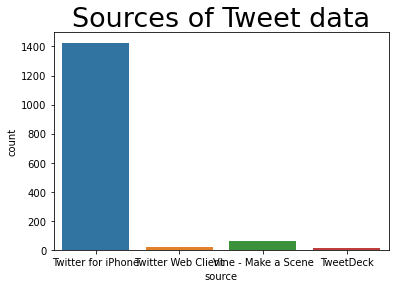

In [102]:

plt.title('Sources of Tweet data', size=27)
sns.countplot(data=merge_df_clean, x='source')

It appears from here that the highest percentage was the iPhone

**We want to know too What is the 3top frequence breed?**

In [103]:
merge_df_clean['breed'].value_counts()[0:3].sort_values(ascending=False)

labrador_retriever    110
golden_retriever      103
cardigan               76
Name: breed, dtype: int64

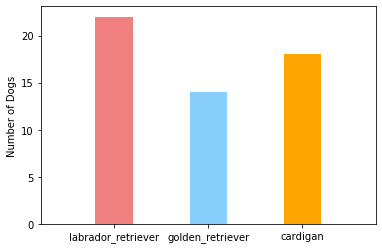

In [104]:
import matplotlib.pyplot as plt
x = [-4,6,16] 
heigh = [22, 14, 18]
width=4
colors = ['lightcoral', 'lightskyblue','orange']
labels = 'labrador_retriever', 'golden_retriever', 'cardigan'
 
plt.bar(x,heigh,width,align='center',color=colors)
plt.xticks(x,labels)
plt.ylabel('Number of Dogs')
plt.axis('equal')
plt.show()

The arrangement was as follows:

1-labrador_retriever got his pedigree%23

2- golden_retriever got his pedigree%14

3-cardigan got his pedigree%18

**What is the most stage of doges?**

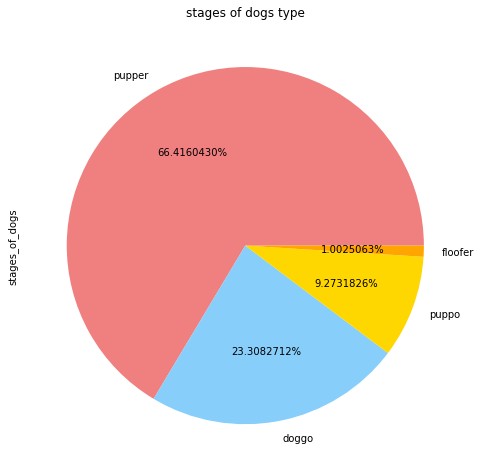

In [106]:
merge_df_clean.stages_of_dogs.value_counts().plot.pie(figsize=(8,9),colors = [  'lightcoral', 'lightskyblue','gold','orange'], autopct='%.7f%%')
plt.title('stages of dogs type')
plt.show()

**The arrangement was as follows:**

1-pupper got his pedigree%66

2- doggo got his pedigree%23

3- puppo got his pedigree%10

4- floofer got his pedigree%100

**Comparison between Retweet Counts and Favorate Counts**

**Retweet Counts vs Favorate Counts**

<ipython-input-107-7fb50262e591>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.suptitle('retweet counts vs favorate counts', Fontsize =15);


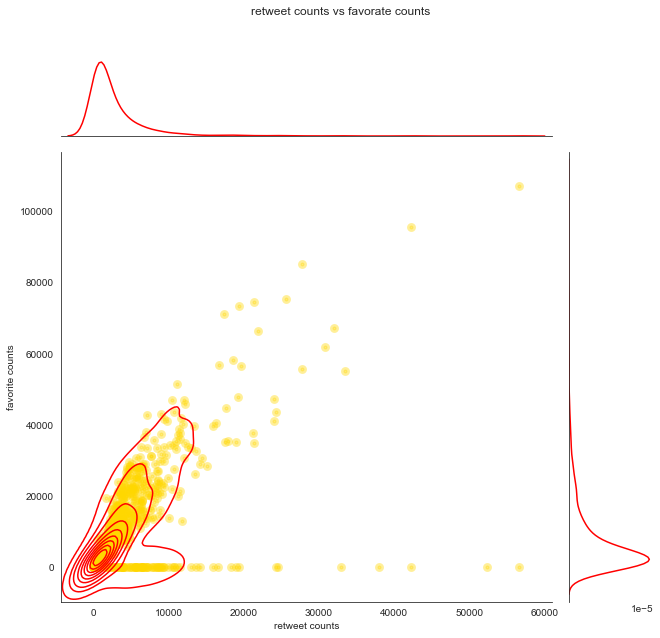

In [107]:
#Visualization
sns.set_style('white')
compare= sns.jointplot(data=merge_df_clean,x="retweet_count", y="favorite_count",kind="kde", color="red", height=9)
compare.plot_joint(plt.scatter, marker=".",s=60,alpha=0.40, c="gold", linewidth=5)
compare.fig.subplots_adjust(top=0.9)
plt.xlabel('retweet counts')
plt.ylabel('favorite counts')
plt.suptitle('retweet counts vs favorate counts', Fontsize =15);

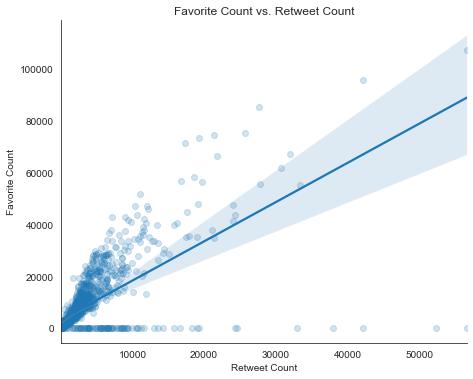

In [108]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=merge_df_clean,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');